# Project Viral App Predictor

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
import gen_wrangle1 as gw

### Acquiring CSV

In [2]:
df=gw.get_csv("Google-Playstore.csv")

CSV found


In [3]:
df.head().T

,0,1,2,3,4
App Name,Gakondo,Ampere Battery Info,Vibook,Smart City Trichy Public Service Vehicles 17UC...,GROW.me
App Id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.doantiepvien.crm,cst.stJoseph.ug17ucs548,com.horodyski.grower
Category,Adventure,Tools,Productivity,Communication,Tools
Rating,0.0,4.4,0.0,5.0,0.0
Rating Count,0.0,64.0,0.0,5.0,0.0
Installs,10+,"5,000+",50+,10+,100+
Minimum Installs,10.0,5000.0,50.0,10.0,100.0
Maximum Installs,15,7662,58,19,478
Free,True,True,True,True,True
Price,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(2312944, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

### Fix Ugly Column Names

In [6]:
df = gw.clean_col(df)

In [7]:
df.head().T

,0,1,2,3,4
app_name,Gakondo,Ampere Battery Info,Vibook,Smart City Trichy Public Service Vehicles 17UC...,GROW.me
app_id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.doantiepvien.crm,cst.stJoseph.ug17ucs548,com.horodyski.grower
category,Adventure,Tools,Productivity,Communication,Tools
rating,0.0,4.4,0.0,5.0,0.0
rating_count,0.0,64.0,0.0,5.0,0.0
installs,10+,"5,000+",50+,10+,100+
minimum_installs,10.0,5000.0,50.0,10.0,100.0
maximum_installs,15,7662,58,19,478
free,True,True,True,True,True
price,0.0,0.0,0.0,0.0,0.0


In [8]:
df.drop(columns=['app_id', 'currency', 'scraped_time',"minimum_installs", "maximum_installs", "minimum_android","last_updated","rating_count"], inplace=True)

In [9]:
#sort df by price
df.sort_values(by='price', ascending=False).head().T

,544468,1539189,789532,1399820,268776
app_name,MESH Connect,Why Not,Acid Reflux Treatment,Most expensive word game,Taxes
category,Productivity,Lifestyle,Health & Fitness,Board,Business
rating,0.0,0.0,0.0,3.4,0.0
installs,10+,0+,1+,"5,000+",0+
free,False,False,False,False,False
price,400.0,399.99,399.99,399.99,399.99
size,20M,21k,3.5M,24M,3.4M
developer_id,Go Evo,Whynotstudio,Happy Healthy Apps,Vadaaa,business555
developer_website,http://www.go-evo.com,NaN,NaN,http://Vadaaa.com,NaN
developer_email,support@go-evo.com,dhwright98@gmail.com,info@internetphotos.net,f251s5@yahoo.com,woownoon2@gmail.com


### Check for Nulls

In [10]:
gw.is_it_null(df) 

False    2312942
True           2
Name: app_name, dtype: int64
False    2312944
Name: category, dtype: int64
False    2290061
True       22883
Name: rating, dtype: int64
False    2312837
True         107
Name: installs, dtype: int64
False    2312944
Name: free, dtype: int64
False    2312944
Name: price, dtype: int64
False    2312748
True         196
Name: size, dtype: int64
False    2312911
True          33
Name: developer_id, dtype: int64
False    1552109
True      760835
Name: developer_website, dtype: int64
False    2312913
True          31
Name: developer_email, dtype: int64
False    2241891
True       71053
Name: released, dtype: int64
False    2312944
Name: content_rating, dtype: int64
False    1891991
True      420953
Name: privacy_policy, dtype: int64
False    2312944
Name: ad_supported, dtype: int64
False    2312944
Name: in_app_purchases, dtype: int64
False    2312944
Name: editors_choice, dtype: int64


In [11]:
#sort nulls
df.isnull().sum().sort_values(ascending=False)

developer_website    760835
privacy_policy       420953
released              71053
rating                22883
size                    196
installs                107
developer_id             33
developer_email          31
app_name                  2
category                  0
free                      0
price                     0
content_rating            0
ad_supported              0
in_app_purchases          0
editors_choice            0
dtype: int64

In [12]:
#drop nulls in minimum_android, released
df.dropna(subset=['released'], inplace=True)
df.dropna(subset=["installs","app_name"],inplace=True)

In [13]:
#fill NaNs with right stuff
values = {"developer_website":"no website", "privacy_policy":"no policy", "developer_id":"no id", "developer_email":"no email", "rating": 0}
df.fillna(value=values, inplace=True)




### Fix Data Types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241882 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   app_name           object 
 1   category           object 
 2   rating             float64
 3   installs           object 
 4   free               bool   
 5   price              float64
 6   size               object 
 7   developer_id       object 
 8   developer_website  object 
 9   developer_email    object 
 10  released           object 
 11  content_rating     object 
 12  privacy_policy     object 
 13  ad_supported       bool   
 14  in_app_purchases   bool   
 15  editors_choice     bool   
dtypes: bool(4), float64(2), object(10)
memory usage: 230.9+ MB


In [15]:
#in installs replace "+" with "" and change dtype to int
df.installs = df.installs.str.replace("+", "").str.replace(",", "").astype(int)


<ipython-input-15-9cced622e91f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.installs = df.installs.str.replace("+", "").str.replace(",", "").astype(int)


In [16]:
df["file_size"] = df["size"]

In [17]:
df.drop(columns=["size"], inplace=True)

In [18]:
df.file_size = df.file_size.str.replace("M", "000").str.replace("k", "").str.replace("Varies with device", "22500").str.replace(",","").str.replace("G","000000").astype(float)

In [19]:
df.released = pd.to_datetime(df.released, format='%b %d, %Y')

In [20]:
#total number of rows by release year
df.released.dt.year.value_counts()


2020    544882
2019    480662
2018    334563
2017    259685
2021    180507
2016    167112
2015    115431
2014     71815
2013     42476
2012     25747
2011     14361
2010      4641
Name: released, dtype: int64

### Making it fair by dropping everthing before and after 2020

In [21]:
#drop rows with release year before 2020 and after 2021
df = df[(df.released.dt.year >= 2020) & (df.released.dt.year < 2021)]


In [22]:
df.released.dt.year.value_counts()

2020    544882
Name: released, dtype: int64

In [23]:
col_list = ["content_rating","category"]
df = gw.encode(df, col_list)

In [24]:
#replace developer_webiste values with boolean
df.developer_website = df.developer_website.str.replace("no website", "False").str.replace("https://", "True").astype(bool)
#replace privacy_policy values with boolean
df.privacy_policy = df.privacy_policy.str.replace("no policy", "False").str.replace("http://", "True").astype(bool)
#replace developer_email values with boolean
df.developer_email = df.developer_email.str.replace("no email", "False").str.replace("mailto:", "True").astype(bool)

In [25]:
df.head()

,app_name,rating,installs,free,price,developer_id,developer_website,developer_email,released,privacy_policy,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,Gakondo,0.0,10,True,0.0,Jean Confident Irénée NIYIZIBYOSE,True,True,2020-02-26,True,...,0,0,0,0,0,0,0,0,0,0
1,Ampere Battery Info,4.4,5000,True,0.0,Webserveis,True,True,2020-05-21,True,...,0,0,0,0,1,0,0,0,0,0
4,GROW.me,0.0,100,True,0.0,Rafal Milek-Horodyski,True,True,2020-02-21,True,...,0,0,0,0,1,0,0,0,0,0
10,Dodge The Cars!,4.9,100,True,0.0,MrScratch,True,True,2020-07-30,True,...,0,0,0,0,0,0,0,0,0,0
13,be.MOBILISED,0.0,100,True,0.0,has.to.be gmbh,True,True,2020-02-09,True,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#make new column for days since release
df["days_since_release"] = (pd.to_datetime("2021-06-15") - df.released).dt.days

In [27]:
#maken new column for rows with same developer_id thats boolean
df["same_dev_id"] = df.duplicated(subset=["developer_id"])

In [28]:
df.drop(columns=["developer_id"], inplace=True)

In [29]:
df.free.value_counts()

True     539628
False      5254
Name: free, dtype: int64

In [30]:
#create new column for rows with a 1000000 or more dowloads thats boolean
df["viral"] = df.installs >= 1000000


In [31]:
df.viral.value_counts() 

False    541015
True       3867
Name: viral, dtype: int64

In [32]:
#drop rows with less than 1000 downloads
df = df[df.installs >= 1000]

In [33]:
df = df.drop(columns=["installs","released"])

In [34]:
#change all bools to 1s and 0s
df = gw.bool_to_int(df)



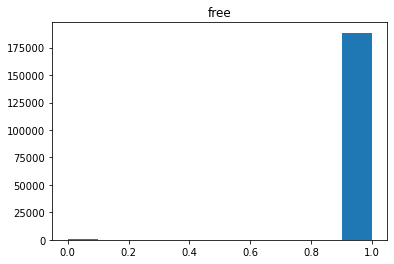

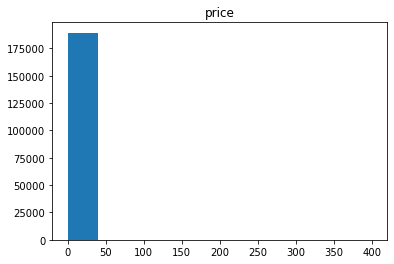

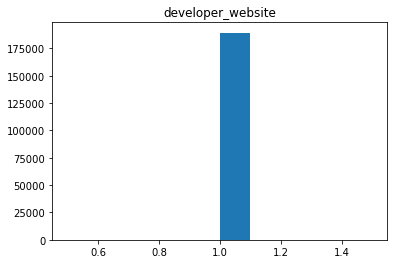

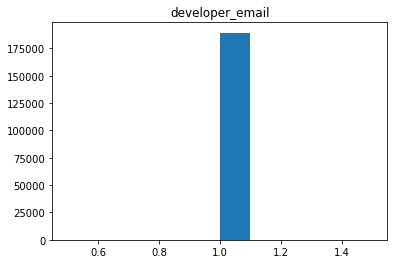

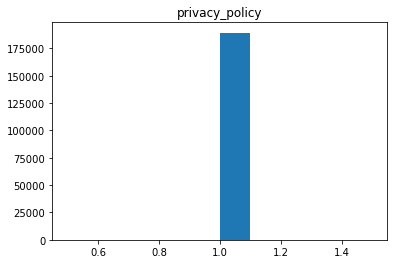

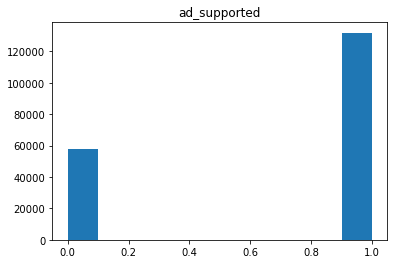

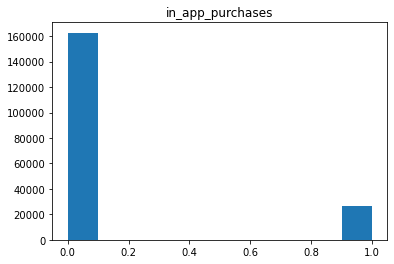

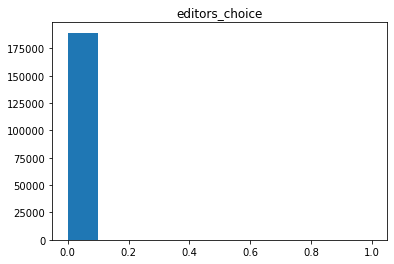

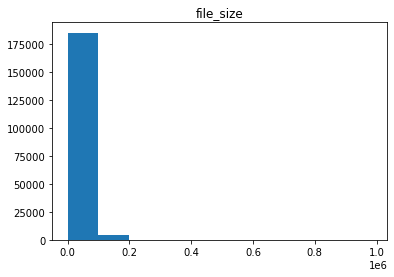

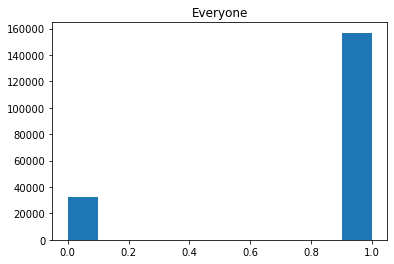

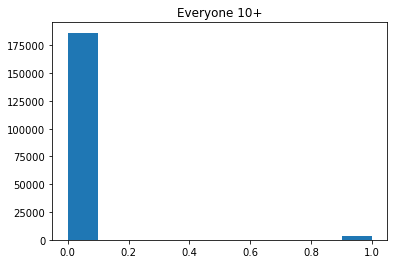

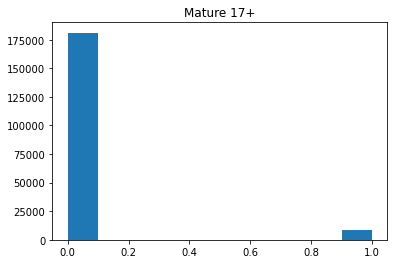

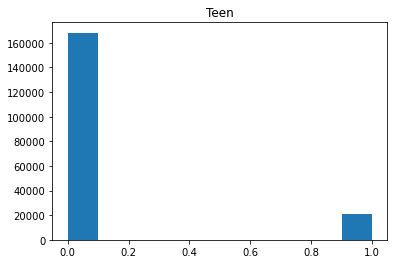

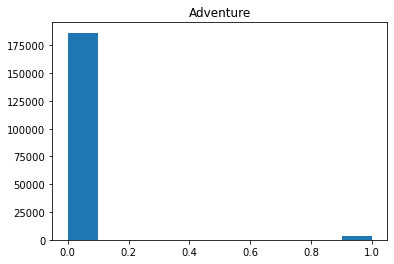

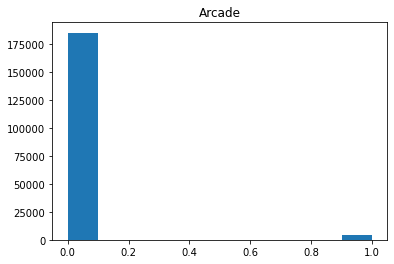

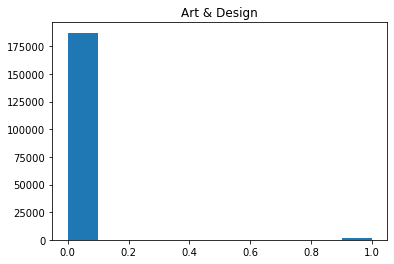

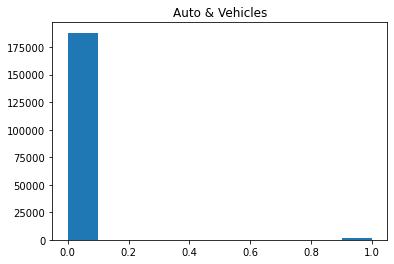

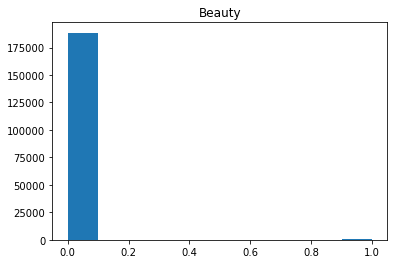

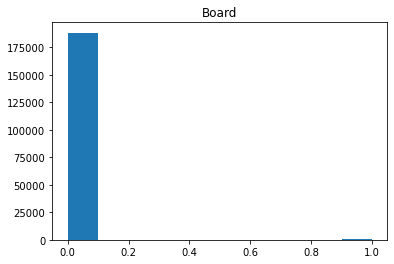

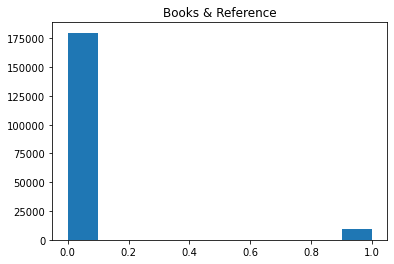

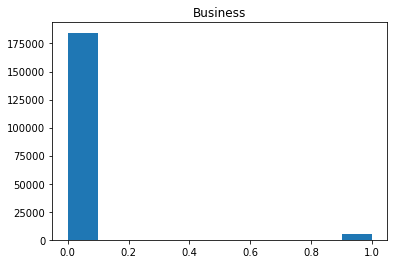

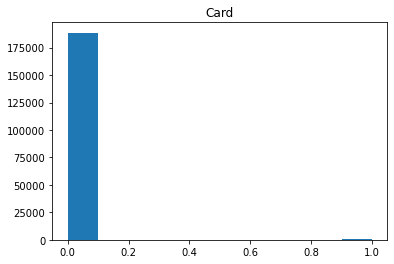

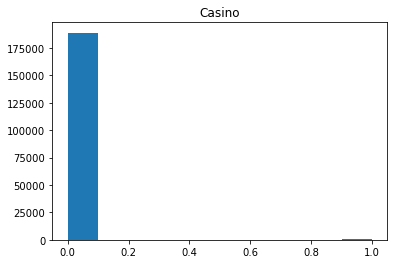

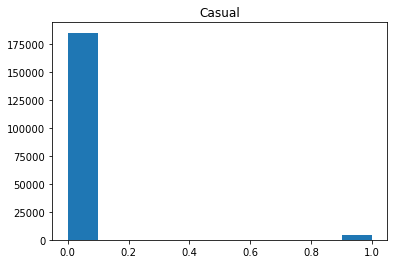

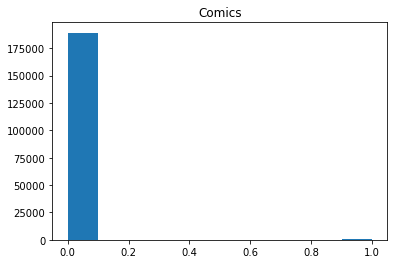

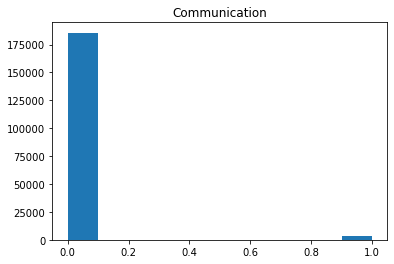

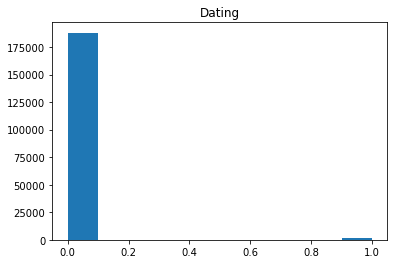

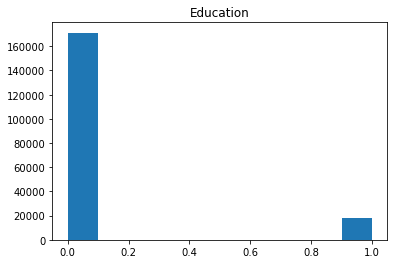

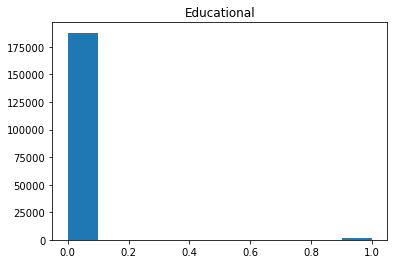

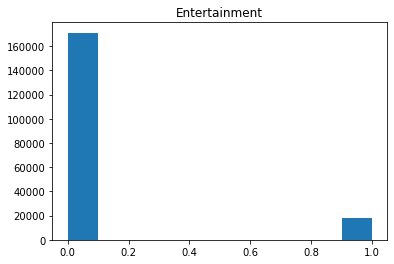

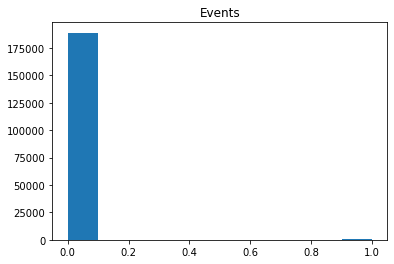

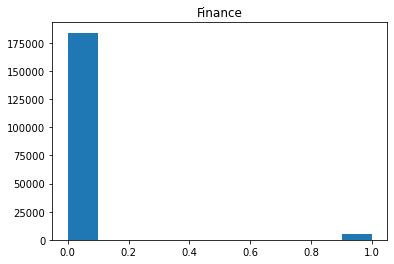

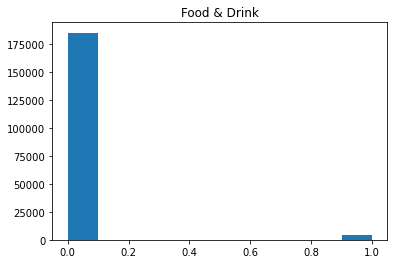

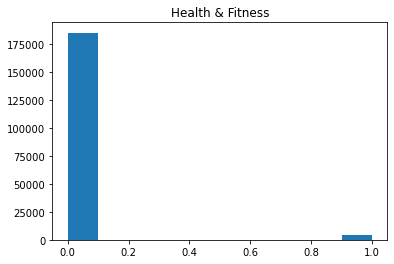

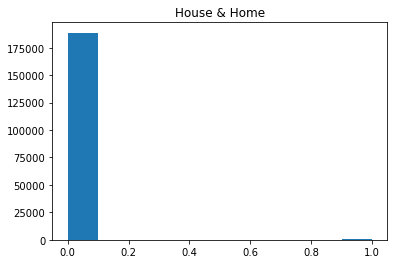

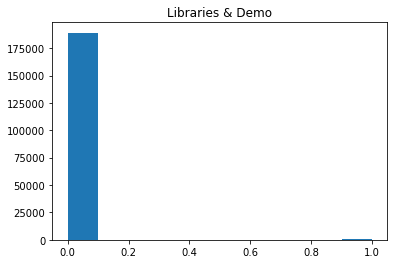

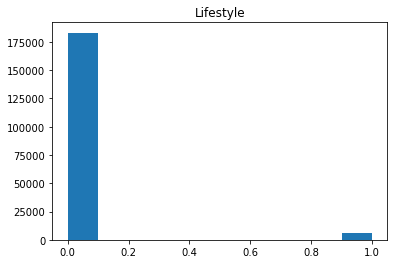

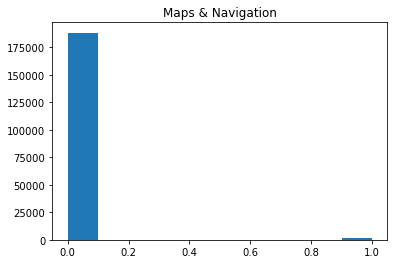

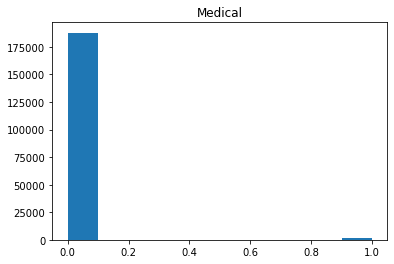

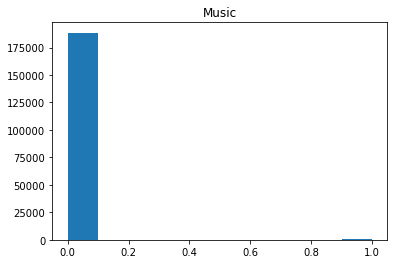

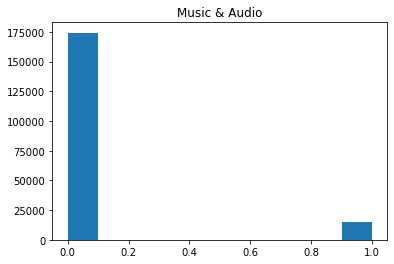

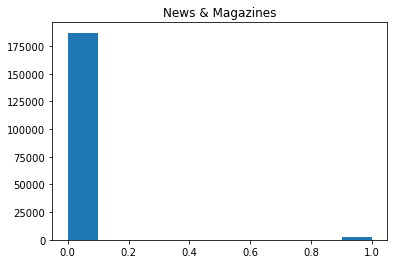

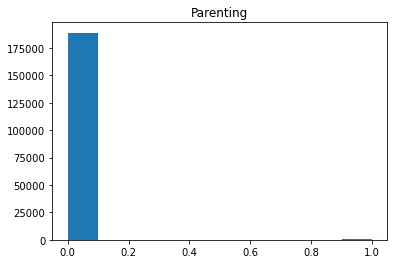

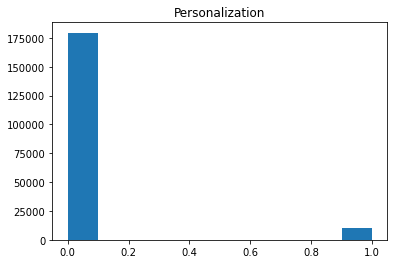

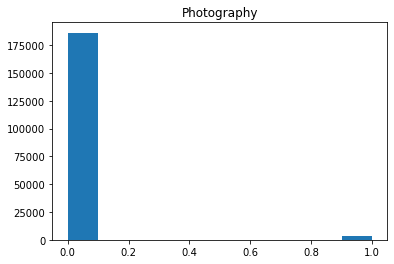

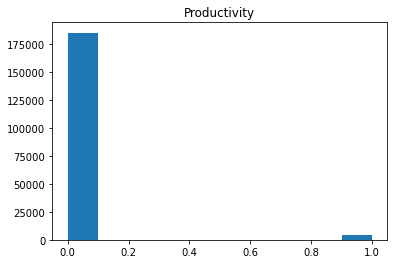

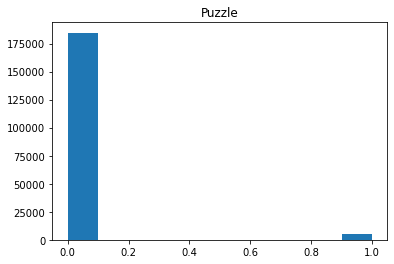

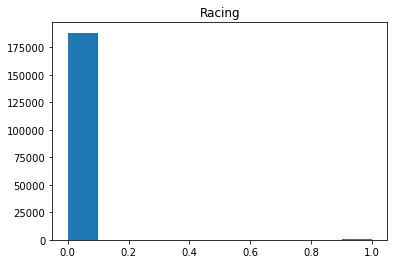

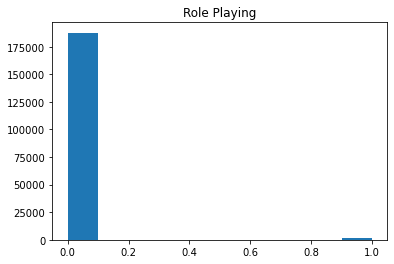

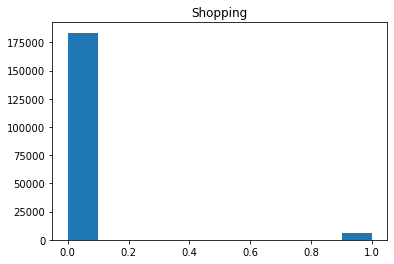

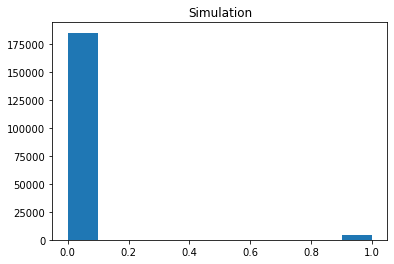

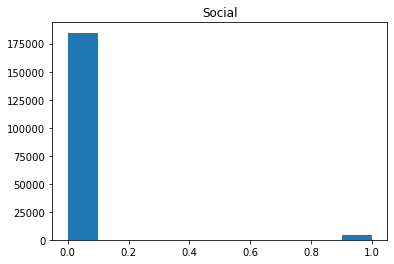

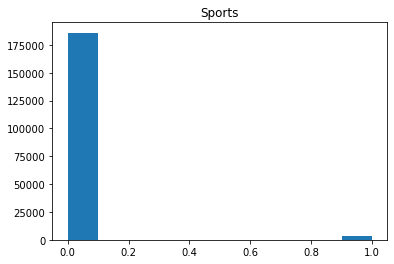

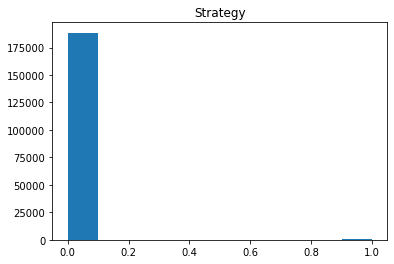

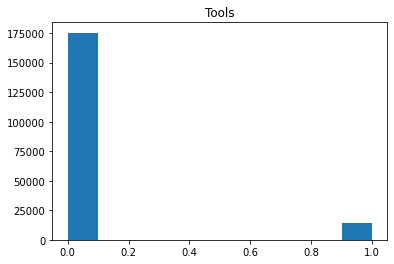

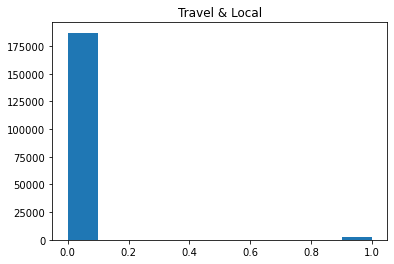

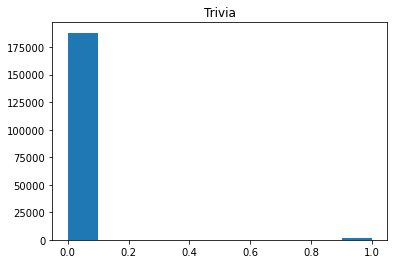

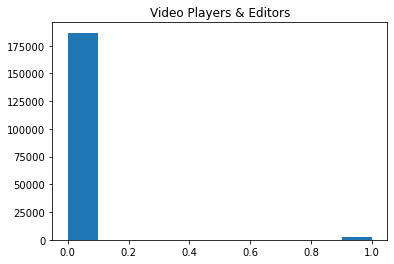

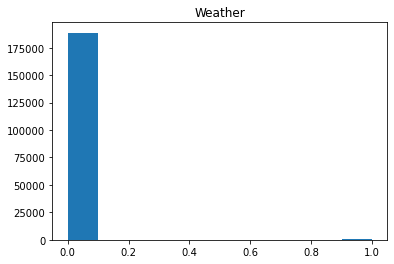

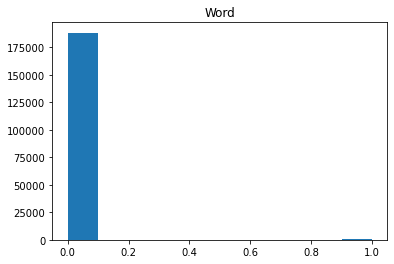

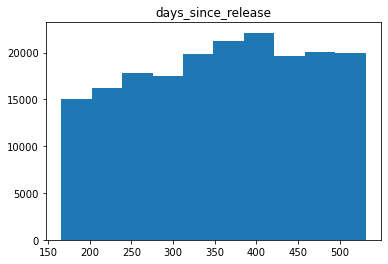

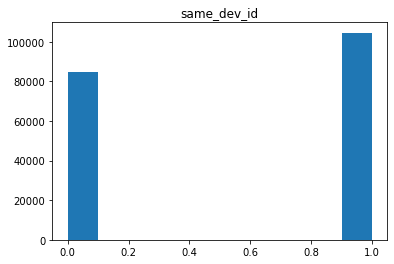

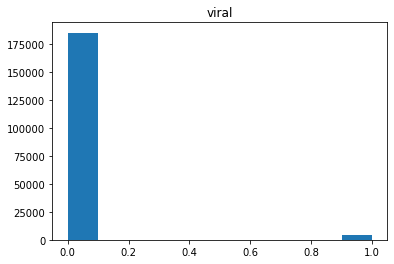

In [35]:
gw.plot_uni_var(df)

In [36]:
train_df, validate_df, test_df = gw.split_function_cat_target(df, 'viral')

In [37]:
train_df.shape

(113648, 65)

In [38]:
validate_df.shape

(37883, 65)

In [39]:
train_df.head()

,app_name,rating,free,price,developer_website,developer_email,privacy_policy,ad_supported,in_app_purchases,editors_choice,...,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word,days_since_release,same_dev_id,viral
2125487,Lollipop Animal,4.4,1,0.0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,370,0,0
978016,kiki tell,4.0,1,0.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,510,1,0
1291503,Short Video Maker-Made in India,4.0,1,0.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,181,0,0
383660,كويكول - حنان لاشين,4.8,1,0.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,406,1,0
81001,চৈতন্যচরিতামৃত মধ্যলীলা (Chaitanya Charitamrita),0.0,1,0.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,275,0,0


In [40]:
gw.cat_and_num_lists(train_df)

The categorical variables are: 
 ['free', 'developer_website', 'developer_email', 'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference', 'Business', 'Card', 'Casino', 'Casual', 'Comics', 'Communication', 'Dating', 'Education', 'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather', 'Word', 'same_dev_id', 'viral'] 

The continuous variables are: 
 ['rating', 'price', 'file_size', 'days_since_release'] 



(['free',
  'developer_website',
  'developer_email',
  'privacy_policy',
  'ad_supported',
  'in_app_purchases',
  'editors_choice',
  'Everyone',
  'Everyone 10+',
  'Mature 17+',
  'Teen',
  'Adventure',
  'Arcade',
  'Art & Design',
  'Auto & Vehicles',
  'Beauty',
  'Board',
  'Books & Reference',
  'Business',
  'Card',
  'Casino',
  'Casual',
  'Comics',
  'Communication',
  'Dating',
  'Education',
  'Educational',
  'Entertainment',
  'Events',
  'Finance',
  'Food & Drink',
  'Health & Fitness',
  'House & Home',
  'Libraries & Demo',
  'Lifestyle',
  'Maps & Navigation',
  'Medical',
  'Music',
  'Music & Audio',
  'News & Magazines',
  'Parenting',
  'Personalization',
  'Photography',
  'Productivity',
  'Puzzle',
  'Racing',
  'Role Playing',
  'Shopping',
  'Simulation',
  'Social',
  'Sports',
  'Strategy',
  'Tools',
  'Travel & Local',
  'Trivia',
  'Video Players & Editors',
  'Weather',
  'Word',
  'same_dev_id',
  'viral'],
 ['rating', 'price', 'file_size', 'days_s

The categorical variables are: 
 ['free', 'developer_website', 'developer_email', 'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference', 'Business', 'Card', 'Casino', 'Casual', 'Comics', 'Communication', 'Dating', 'Education', 'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather', 'Word', 'same_dev_id', 'viral'] 

The continuous variables are: 
 ['rating', 'price', 'file_size', 'days_since_release'] 

RATING and viral


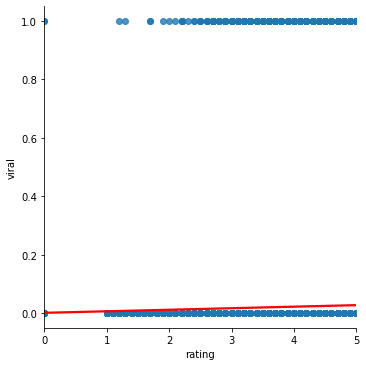

PRICE and viral


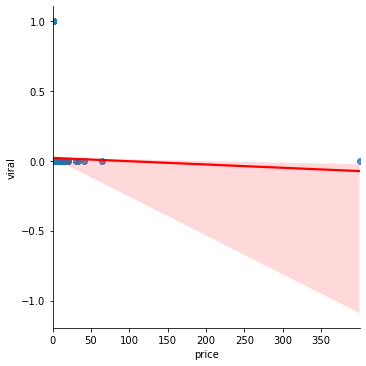

FILE_SIZE and viral


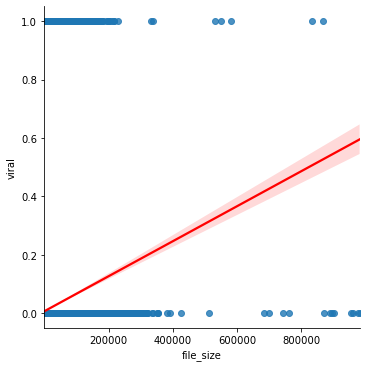

DAYS_SINCE_RELEASE and viral


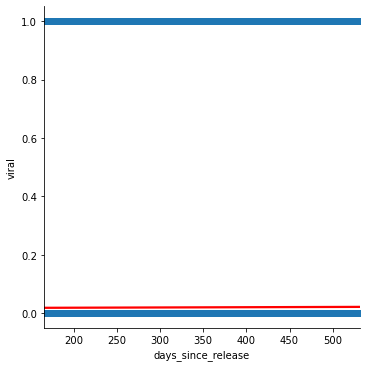

In [41]:
gw.plot_variable_target_pairs(train_df,"viral")

The categorical variables are: 
 ['free', 'developer_website', 'developer_email', 'privacy_policy', 'ad_supported', 'in_app_purchases', 'editors_choice', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Adventure', 'Arcade', 'Art & Design', 'Auto & Vehicles', 'Beauty', 'Board', 'Books & Reference', 'Business', 'Card', 'Casino', 'Casual', 'Comics', 'Communication', 'Dating', 'Education', 'Educational', 'Entertainment', 'Events', 'Finance', 'Food & Drink', 'Health & Fitness', 'House & Home', 'Libraries & Demo', 'Lifestyle', 'Maps & Navigation', 'Medical', 'Music', 'Music & Audio', 'News & Magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Puzzle', 'Racing', 'Role Playing', 'Shopping', 'Simulation', 'Social', 'Sports', 'Strategy', 'Tools', 'Travel & Local', 'Trivia', 'Video Players & Editors', 'Weather', 'Word', 'same_dev_id', 'viral'] 

The continuous variables are: 
 ['rating', 'price', 'file_size', 'days_since_release'] 



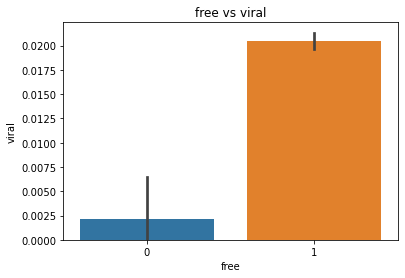

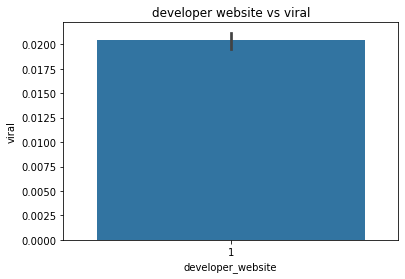

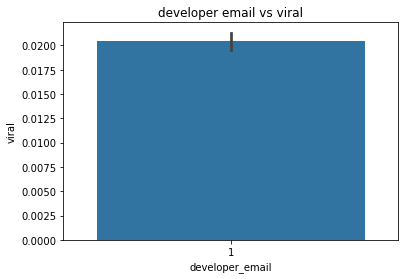

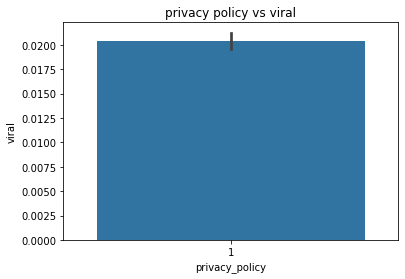

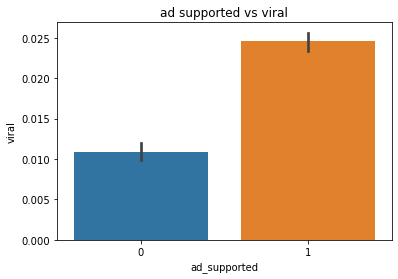

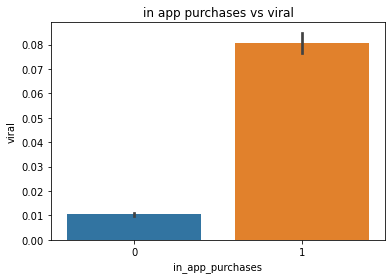

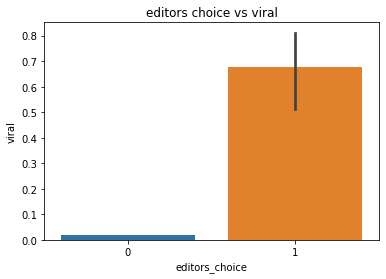

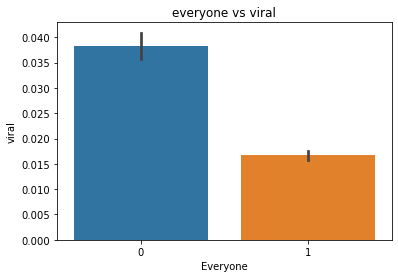

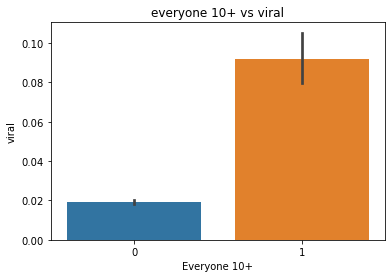

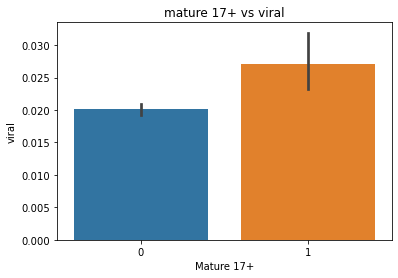

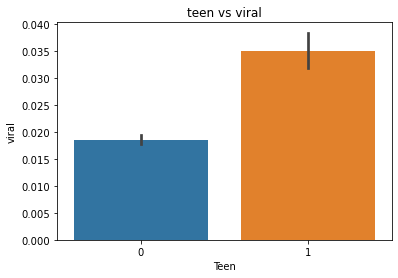

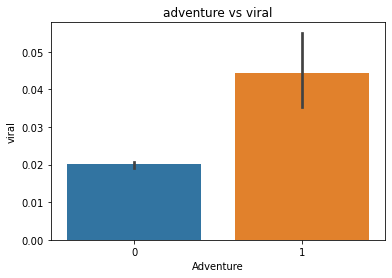

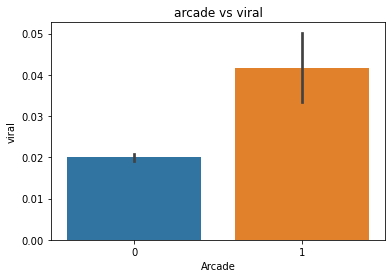

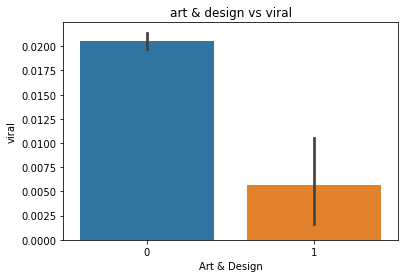

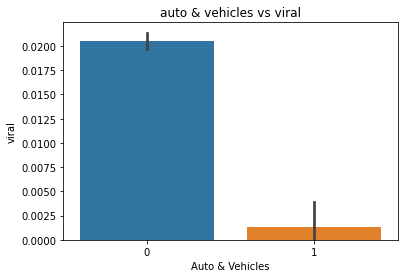

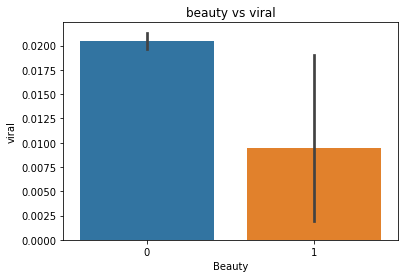

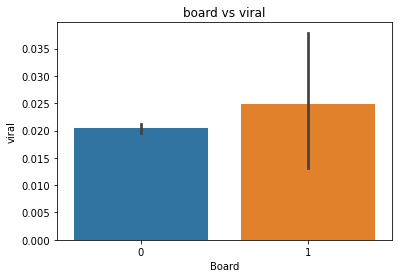

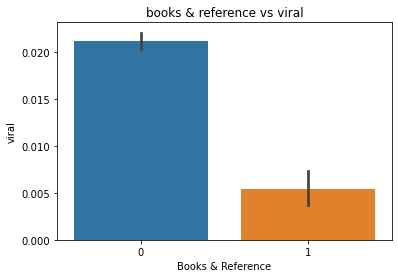

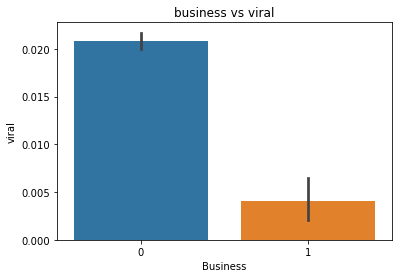

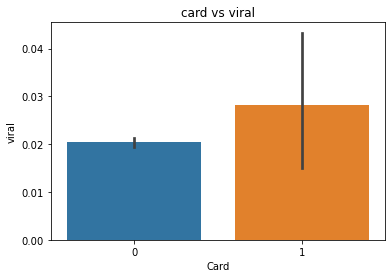

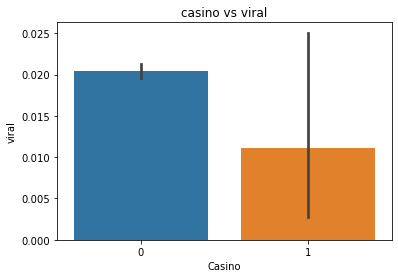

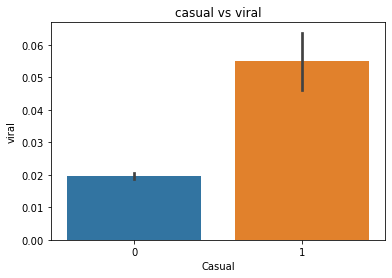

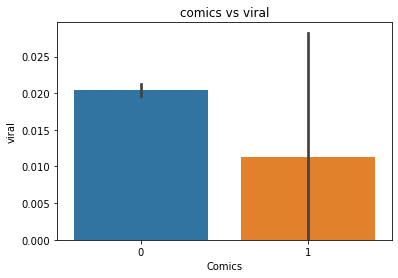

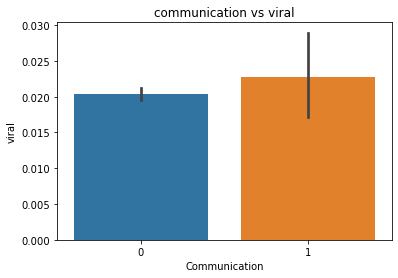

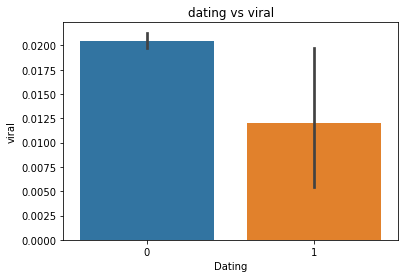

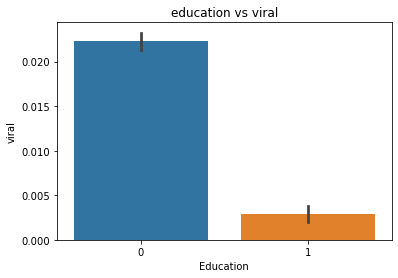

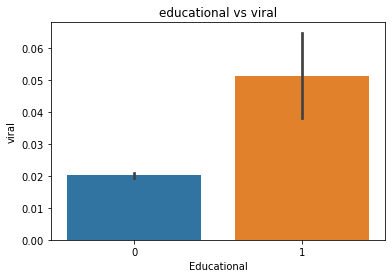

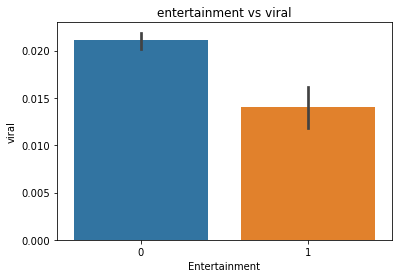

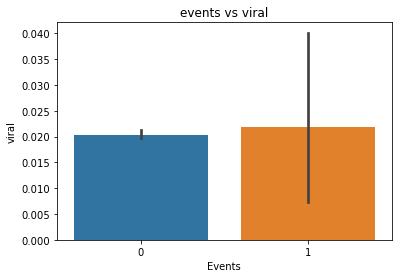

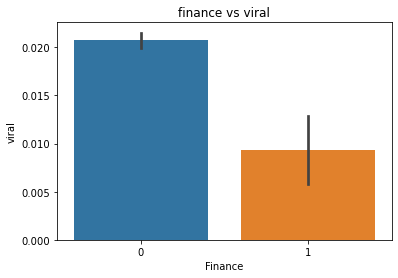

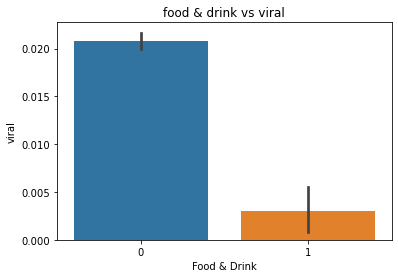

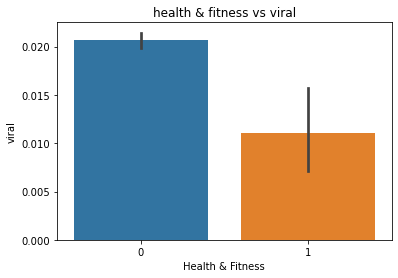

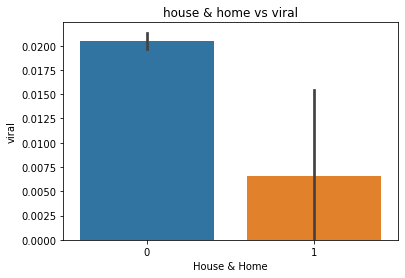

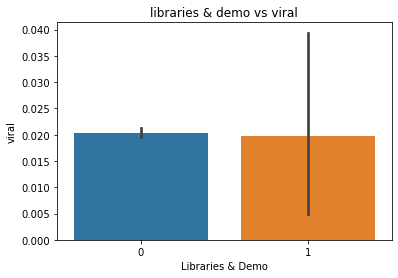

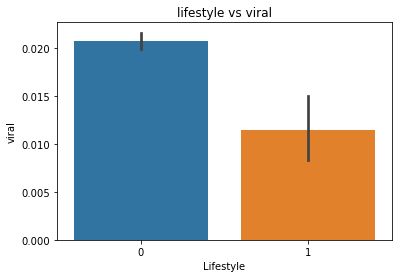

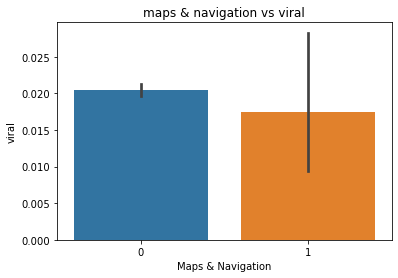

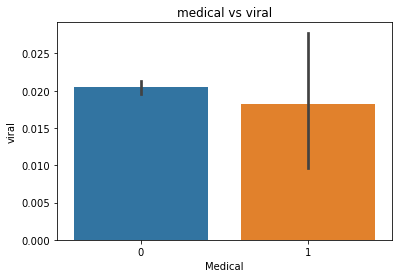

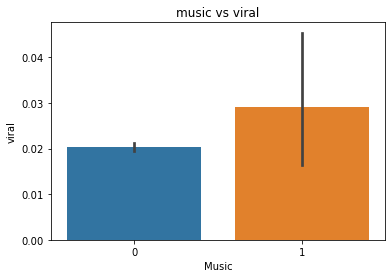

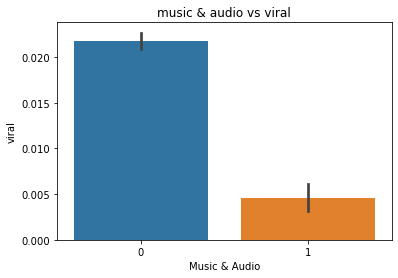

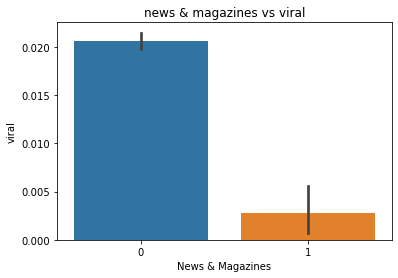

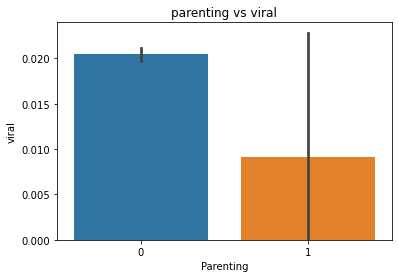

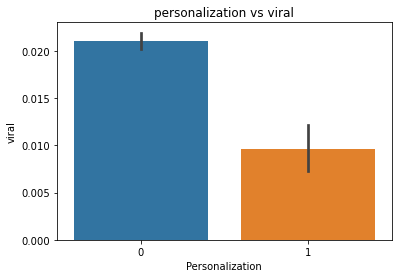

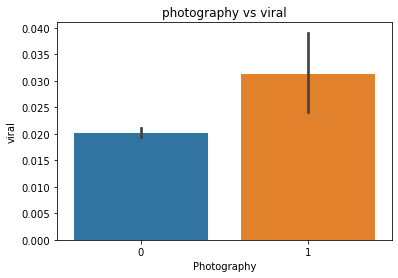

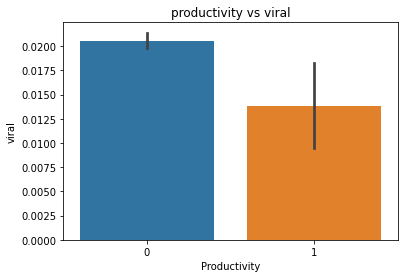

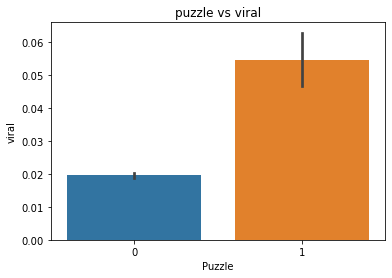

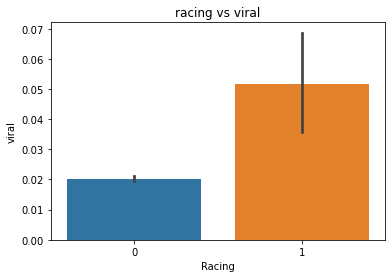

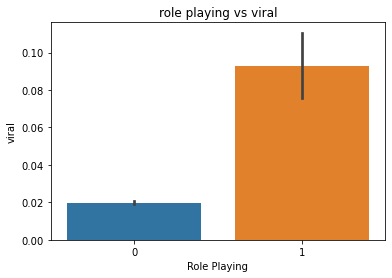

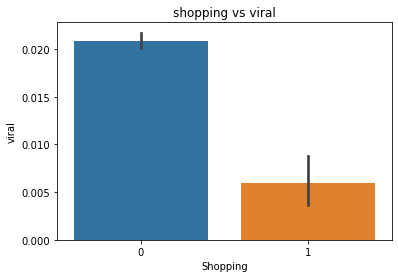

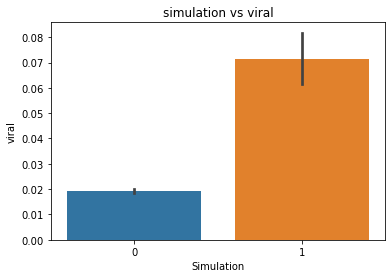

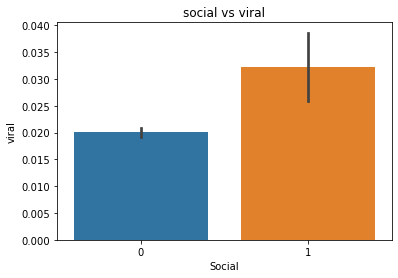

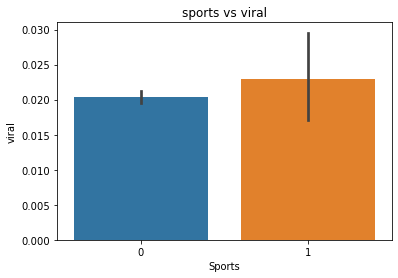

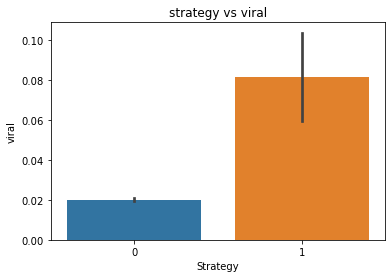

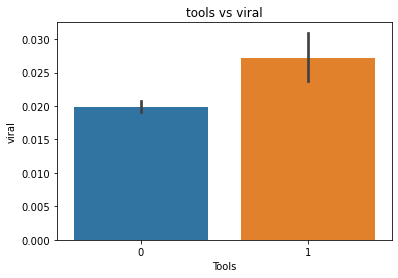

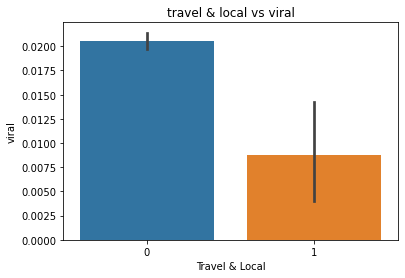

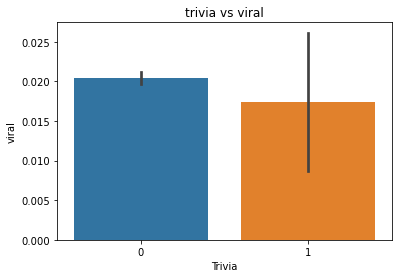

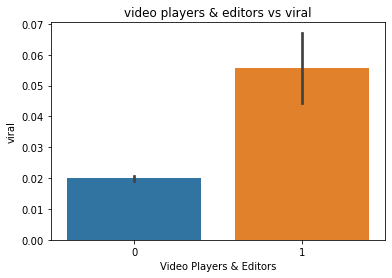

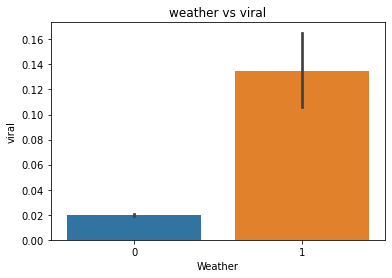

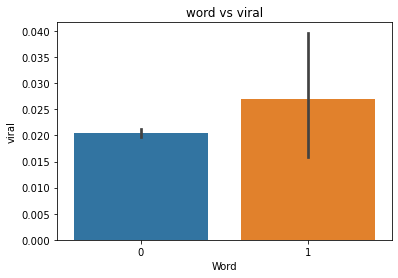

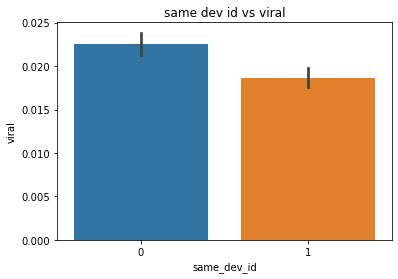

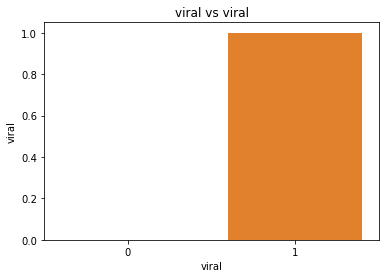

In [42]:
gw.plot_categorical_and_target_var(train_df, "viral")